# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

key =api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"



# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

key

'e13fc988edbd674b5d83856264c0569b'

In [2]:
#testing
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + key
#url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b'

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
'''Creating the log'''
#List of desired  factors
name=[]
lon=[]
lat=[]
clouds=[]
maxtemp=[]
mintemp=[]
country=[]
windspeed=[]
humidity=[]
date=[]

#record counter
count=1

In [5]:
#testing
#response = requests.get(f"{url}&q={cities[1]}").json()
#response

{'coord': {'lon': 38.4, 'lat': 54.04},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'model',
 'main': {'temp': 32.56,
  'pressure': 1031,
  'humidity': 93,
  'temp_min': 32.56,
  'temp_max': 32.56,
  'sea_level': 1031,
  'grnd_level': 1006},
 'wind': {'speed': 1.99, 'deg': 89},
 'clouds': {'all': 90},
 'dt': 1574125722,
 'sys': {'country': 'RU', 'sunrise': 1574139657, 'sunset': 1574169763},
 'timezone': 10800,
 'id': 496269,
 'name': 'Severo-Zadonsk',
 'cod': 200}

In [6]:
#Create url for api forward looping using api key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + key

#forward loops for adding each list
for city in cities:
#not every request will yield a city, the try and except will avoid null calls
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        name.append(response["name"])
        clouds.append(response["clouds"]["all"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        country.append(response["sys"]["country"])
        maxtemp.append(response["main"]["temp_max"])
        mintemp.append(response["main"]["temp_min"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        windspeed.append(response["wind"]["speed"])
        
#to give back the name and number of the log and +1 to record
        log_name = response["name"]
        print(f"Processing Record {count} | {log_name}")
        print(f"{url}&q={city}")
        count= count + 1
    # If no record found "skip" to next call
    except Exception:
        print("City not found. Skipping...")
    continue

Processing Record 1 | Busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=busselton
Processing Record 2 | Yerbogachen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=yerbogachen
Processing Record 3 | Talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=talnakh
Processing Record 4 | Bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=bluff
Processing Record 5 | Denpasar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=denpasar
City not found. Skipping...
Processing Record 6 | Kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=kapaa
Processing Record 7 | Rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d8385

Processing Record 58 | Hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=hermanus
Processing Record 59 | Petropavlovsk-Kamchatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=petropavlovsk-kamchatskiy
Processing Record 60 | Puerto Cabezas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=puerto cabezas
Processing Record 61 | Rawson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=rawson
Processing Record 62 | Saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=saskylakh
Processing Record 63 | Cape Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=cape town
Processing Record 64 | Pahrump
http://api.openweathermap.org/data/2.5/weather?units=Imperi

Processing Record 114 | Anadyr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=anadyr
Processing Record 115 | Tautira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=tautira
Processing Record 116 | Te Anau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=te anau
Processing Record 117 | Kyabe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=kyabe
Processing Record 118 | Victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=victoria
Processing Record 119 | Saint-Francois
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=saint-francois
Processing Record 120 | Berlevag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569

Processing Record 170 | Port Hardy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=port hardy
Processing Record 171 | Sao Jose da Coroa Grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=sao jose da coroa grande
Processing Record 172 | Port Hedland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=port hedland
Processing Record 173 | Esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=esperance
Processing Record 174 | Arraial do Cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=arraial do cabo
Processing Record 175 | Fairbanks
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=fairbanks
Processing Record 176 | Half Moon Bay
http://api.openweathermap.org/

Processing Record 225 | Kayasula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=kayasula
Processing Record 226 | Marathon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=marathon
City not found. Skipping...
Processing Record 227 | Kalmunai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=kalmunai
City not found. Skipping...
Processing Record 228 | Qujing
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=qujing
Processing Record 229 | Alofi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=alofi
Processing Record 230 | Saint George
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=saint george
Processing Record 231 | Tiksi
http://api.openweathermap.org/data/2.5/weather

Processing Record 280 | Burgeo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=burgeo
Processing Record 281 | Wahiawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=wahiawa
Processing Record 282 | Lujan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=lujan
Processing Record 283 | Salalah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=salalah
Processing Record 284 | Sovetskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=sovetskiy
Processing Record 285 | Gorzow Wielkopolski
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=gorzow wielkopolski
Processing Record 286 | Coihaique
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d

Processing Record 336 | Hauterive
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=hauterive
Processing Record 337 | Romny
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=romny
Processing Record 338 | Missoula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=missoula
Processing Record 339 | Chabahar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=chabahar
Processing Record 340 | Tessalit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=tessalit
Processing Record 341 | Coos Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=coos bay
Processing Record 342 | Codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569

Processing Record 391 | Pontianak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=pontianak
Processing Record 392 | Kovur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=kovur
Processing Record 393 | Batagay-Alyta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=batagay-alyta
Processing Record 394 | Mandurah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=mandurah
Processing Record 395 | Svetlogorsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=svetlogorsk
Processing Record 396 | Manggar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=manggar
City not found. Skipping...
Processing Record 397 | Smidovich
http://api.openweathermap.org/data/2.5/weather?units=Imper

Processing Record 447 | Pacific Grove
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=pacific grove
Processing Record 448 | Kongwa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=kongwa
Processing Record 449 | Pangoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=pangoa
Processing Record 450 | Calbuco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=calbuco
Processing Record 451 | Tagusao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=tagusao
Processing Record 452 | Praia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=praia
Processing Record 453 | Ciudad Bolivar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569

Processing Record 503 | Xichang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=xichang
Processing Record 504 | Cagliari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=cagliari
Processing Record 505 | Ventspils
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=ventspils
Processing Record 506 | Kawalu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=kawalu
Processing Record 507 | Omsukchan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=omsukchan
Processing Record 508 | Borgarnes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264c0569b&q=borgarnes
Processing Record 509 | Mikhaylovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e13fc988edbd674b5d83856264

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#write into Dataframe

weather_pd=pd.DataFrame({
    "City":name,
    "Country":country,
    "Cloudiness":clouds,
    "lon":lon,
    "lat":lat,
    "maxtemp":maxtemp,
    "mintemp":mintemp,
    "windspeed":windspeed,
    "humidity":humidity,
    "date":date
})

In [9]:
weather_pd.to_csv(r'city_weathers.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

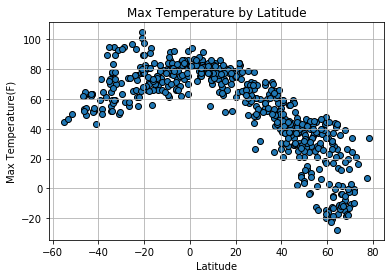

In [11]:
plt.title(f"Max Temperature by Latitude")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")

plt.scatter(weather_pd['lat'], weather_pd['maxtemp'] , edgecolors='black')

plt.grid(b=True)

plt.savefig("./Images/latitude_and_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

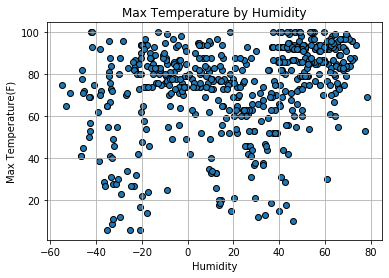

In [12]:
plt.title(f"Max Temperature by Humidity")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Humidity")

plt.scatter(weather_pd['lat'], weather_pd['humidity'], edgecolors='black')

plt.grid(b=True)

plt.savefig("./Images/latitude_temp.png")
plt.show()

#### Latitude vs. Cloudiness Plot

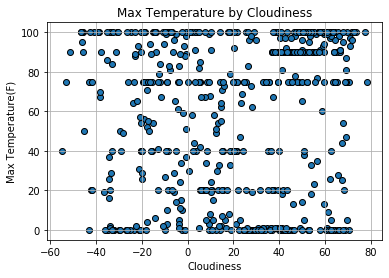

In [13]:
plt.title(f"Max Temperature by Cloudiness")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Cloudiness")

plt.scatter(weather_pd['lat'], weather_pd['Cloudiness'], edgecolors='black')

plt.grid(b=True)

plt.savefig("./Images/latitude_humidity.png")
plt.show()

#### Latitude vs. Wind Speed Plot

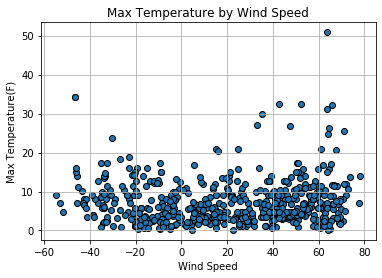

In [15]:
plt.title(f"Max Temperature by Wind Speed")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Wind Speed")

plt.scatter(weather_pd['lat'], weather_pd['windspeed'], edgecolors='black')

plt.grid(b=True)

plt.savefig("./Images/latitude_humidity.png")
plt.show()


# CONCLUSION

1. . Temperature increases near not necessarily at the equator, but wherever the most direct angle the sun is facing the earth. As earth axis changes over the seasons, the hottest parts of the earth slightly change.


2. .

3. . Cloudiness is not indicative to latitude, but location from a body of water and wind direction.


3 - There is No Strong Correlation Between Equatorial Distance and Either Wind Speed or Humidity

There is no correlation between equatorial distance and wind speed, however there is enough between equatorial distance and humidity to warrant additional sampling to demonstrate a trend for Temperate latitudes to have lower humidity.
